reco dark photon $Z_d(\rightarrow e^+e^-)$ as lepton-jet/PFAK4Jet -- $\Delta R$ match between ($Z_d$, lj/jet)
>NOTE: the sample used here are $2\mu2e$ sigal samples with $m_{\chi\bar{\chi}}$=500GeV, $m_{Z_d}$={0.25, 1.2, 5}GeV, $\bar{lxy}$=150cm

In [1]:
from rootpy.io import root_open
import os
from FireROOT.Analysis.Utils import *
from rootpy.plotting.style import set_style
from rootpy.plotting import Canvas, Efficiency, Legend
from rootpy.plotting.shapes import Line

Welcome to JupyROOT 6.12/07


In [2]:
fn = os.path.join(os.getenv('CMSSW_BASE'), 'src/FireROOT/Analysis/python/outputs/rootfiles/slimTrees/recoZdToEl__TREE.root')
f = root_open(fn)

In [3]:
f.keys()

[Key('egmlj')]

In [4]:
t = f.egmlj

In [5]:
sorted(t.branchnames)

['dp_daudr',
 'dp_eta',
 'dp_lxy',
 'dp_lz',
 'dp_pt',
 'ele_gendr',
 'ele_grade',
 'ele_idbit',
 'ele_pt',
 'j_emfrac',
 'j_gendr',
 'j_hadfrac',
 'j_id',
 'j_ncands',
 'j_neuemfrac',
 'j_neuhadfrac',
 'j_pt',
 'j_rawpt',
 'lj_area',
 'lj_gendr',
 'lj_ndau',
 'lj_nele',
 'lj_npho',
 'lj_pt',
 'ljsrc_gendr',
 'ljsrc_pt',
 'ljsrc_type',
 'pho_gendr',
 'pho_grade',
 'pho_haspix',
 'pho_idbit',
 'pho_isconv',
 'pho_pt',
 'rho',
 's_LXY',
 's_MA',
 's_MXX']

In [6]:
set_style(MyStyle())
canvas = Canvas(500,400)

INFO:rootpy.plotting.style] using ROOT style 'CMSTDR'


# gen info

## dark photon

In [7]:
dplxy = t.Draw('dp_lxy')

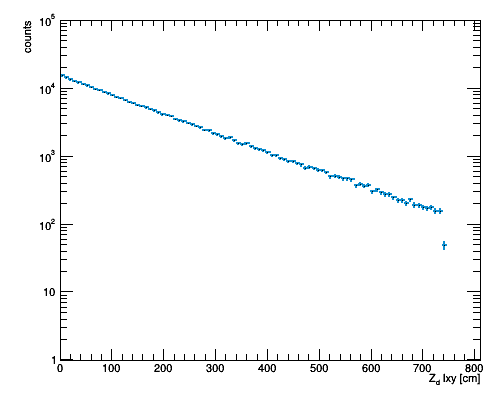

In [8]:
canvas.clear()

dplxy.linecolor=sigCOLORS[0]
dplxy.linewidth=2
draw([dplxy],pad=canvas, logy=True, ylimits=(1,1e5), xtitle='Z_{d} lxy [cm]', ytitle='counts')
canvas.draw()

In [9]:
dplz = t.Draw('dp_lz')

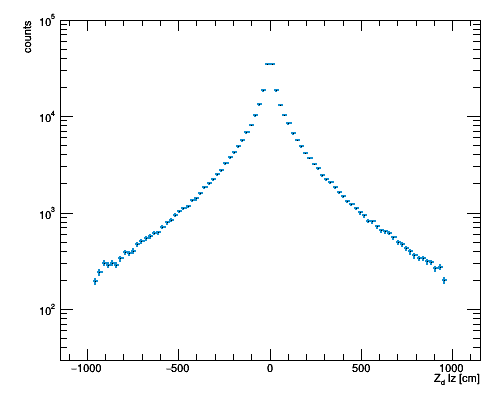

In [10]:
canvas.clear()

dplz.linecolor=sigCOLORS[0]
dplz.linewidth=2
draw([dplz],pad=canvas, logy=True, ylimits=(30,1e5), xtitle='Z_{d} lz [cm]', ytitle='counts')
canvas.draw()

In [11]:
dppt = t.Draw('dp_pt')

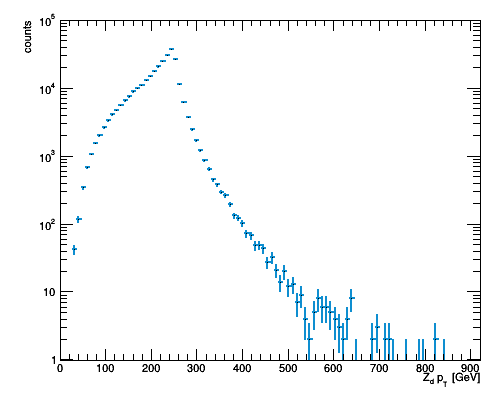

In [12]:
canvas.clear()

dppt.linecolor=sigCOLORS[0]
dppt.linewidth=2
draw([dppt],pad=canvas, logy=True, ylimits=(1,1e5), xtitle='Z_{d} p_{T} [GeV]', ytitle='counts')
canvas.draw()

In [13]:
dpeta = t.Draw('dp_eta')

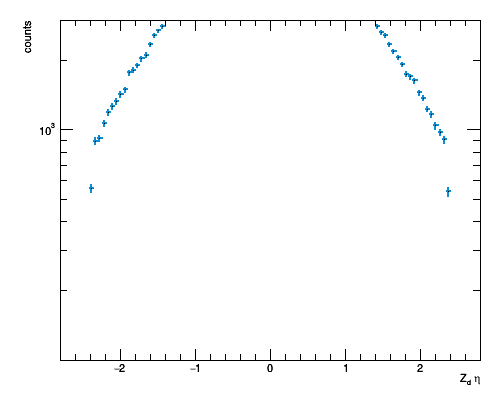

In [14]:
canvas.clear()

dpeta.linecolor=sigCOLORS[0]
dpeta.linewidth=2
draw([dpeta],pad=canvas, logy=True, ylimits=(1e2,3e3), xtitle='Z_{d} #eta', ytitle='counts')
canvas.draw()

In [15]:
dpdaudr = t.Draw('dp_daudr')

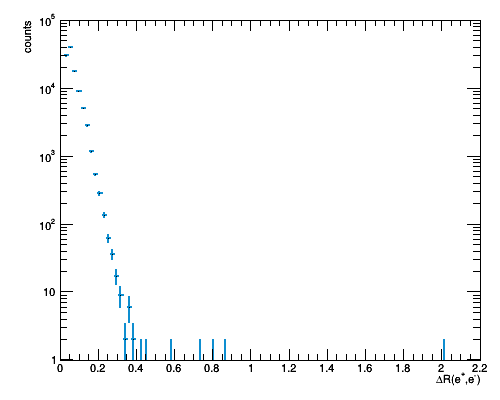

In [16]:
canvas.clear()

dpdaudr.linecolor=sigCOLORS[0]
dpdaudr.linewidth=2
draw([dpdaudr],pad=canvas, logy=True, ylimits=(1,1e5), xtitle='#DeltaR(e^{+},e^{-})', ytitle='counts')
canvas.draw()

# reco

## lepton-jet

### efficiencies

In [17]:
dplxy_total  = t.Draw(t.b.dp_lxy>>('dplxy_total', 500, 0, 750))
dplxy_passed = t.Draw(t.b.dp_lxy>>('dplxy_passed', 500, 0, 750), 'lj_gendr>0')
dplxy_passed_type1 = t.Draw(t.b.dp_lxy>>('dplxy_passed_type1', 500, 0, 750), 'lj_gendr>0&lj_nele>0')
dplxy_passed_type2 = t.Draw(t.b.dp_lxy>>('dplxy_passed_type2', 500, 0, 750), 'lj_gendr>0&lj_nele==0')

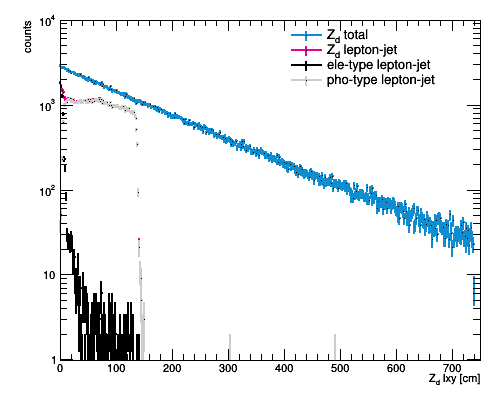

In [18]:
canvas.clear()

dplxy_total .linecolor=sigCOLORS[0]
dplxy_total .linewidth=2
dplxy_passed.linecolor=sigCOLORS[1]
dplxy_passed.linewidth=2
dplxy_passed_type1.linecolor=sigCOLORS[2]
dplxy_passed_type1.linewidth=2
dplxy_passed_type2.linecolor=sigCOLORS[3]
dplxy_passed_type2.linewidth=2
draw([dplxy_total, dplxy_passed, dplxy_passed_type1, dplxy_passed_type2],
     pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} lxy [cm]', ytitle='counts')
leg = Legend(4, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplxy_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplxy_passed, 'Z_{d} lepton-jet', 'LEP')
leg.AddEntry(dplxy_passed_type1, 'ele-type lepton-jet', 'LEP')
leg.AddEntry(dplxy_passed_type2, 'pho-type lepton-jet', 'LEP')
leg.Draw()
canvas.draw()

In [19]:
ljeffi_g = Efficiency(dplxy_passed, dplxy_total).graph
ljeffi_g_type1 = Efficiency(dplxy_passed_type1, dplxy_total).graph
ljeffi_g_type2 = Efficiency(dplxy_passed_type2, dplxy_total).graph

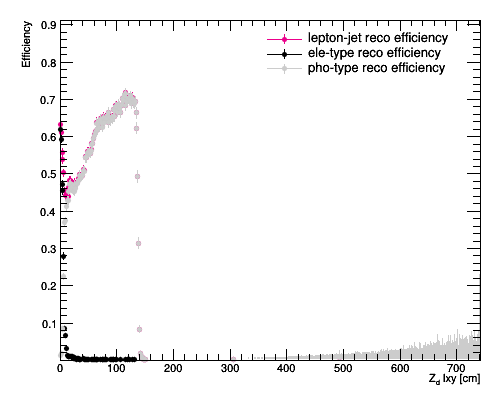

In [20]:
canvas.clear()

ljeffi_g.drawstyle='APZ0'
ljeffi_g.color=sigCOLORS[1]
ljeffi_g.markersize=0.5
ljeffi_g_type1.drawstyle='PZ0'
ljeffi_g_type1.color=sigCOLORS[2]
ljeffi_g_type1.markersize=0.5
ljeffi_g_type2.drawstyle='PZ0'
ljeffi_g_type2.color=sigCOLORS[3]
ljeffi_g_type2.markersize=0.5
draw([ljeffi_g, ljeffi_g_type1, ljeffi_g_type2], xtitle='Z_{d} lxy [cm]', ytitle='Efficiency')
leg = Legend(3, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_g, 'lepton-jet reco efficiency', 'LEP')
leg.AddEntry(ljeffi_g_type1, 'ele-type reco efficiency', 'LEP')
leg.AddEntry(ljeffi_g_type2, 'pho-type reco efficiency', 'LEP')
leg.Draw()
canvas.draw()

In [21]:
dplz_total  = t.Draw(abs(t.b.dp_lz)>>('dplz_total', 500, 0, 750))
dplz_passed = t.Draw(abs(t.b.dp_lz)>>('dplz_passed', 500, 0, 750), 'lj_gendr>0')
dplz_passed_type1 = t.Draw(abs(t.b.dp_lz)>>('dplz_passed_type1', 500, 0, 750), 'lj_gendr>0&lj_nele>0')
dplz_passed_type2 = t.Draw(abs(t.b.dp_lz)>>('dplz_passed_type2', 500, 0, 750), 'lj_gendr>0&lj_nele==0')

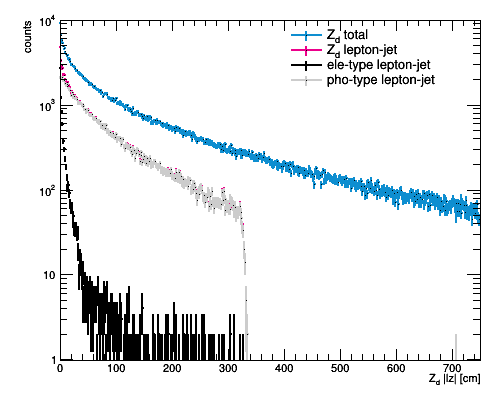

In [22]:
canvas.clear()

dplz_total .linecolor=sigCOLORS[0]
dplz_total .linewidth=2
dplz_passed.linecolor=sigCOLORS[1]
dplz_passed.linewidth=2
dplz_passed_type1.linecolor=sigCOLORS[2]
dplz_passed_type1.linewidth=2
dplz_passed_type2.linecolor=sigCOLORS[3]
dplz_passed_type2.linewidth=2
draw([dplz_total, dplz_passed, dplz_passed_type1, dplz_passed_type2],
     pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} |lz| [cm]', ytitle='counts')
leg = Legend(4, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplz_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplz_passed, 'Z_{d} lepton-jet', 'LEP')
leg.AddEntry(dplz_passed_type1, 'ele-type lepton-jet', 'LEP')
leg.AddEntry(dplz_passed_type2, 'pho-type lepton-jet', 'LEP')
leg.Draw()
canvas.draw()

In [23]:
ljlzeffi_g = Efficiency(dplz_passed, dplz_total).graph
ljlzeffi_g_type1 = Efficiency(dplz_passed_type1, dplz_total).graph
ljlzeffi_g_type2 = Efficiency(dplz_passed_type2, dplz_total).graph

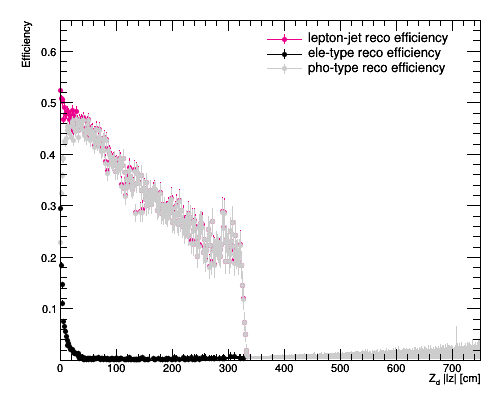

In [24]:
canvas.clear()

ljlzeffi_g.drawstyle='APZ0'
ljlzeffi_g.color=sigCOLORS[1]
ljlzeffi_g.markersize=0.5
ljlzeffi_g_type1.drawstyle='PZ0'
ljlzeffi_g_type1.color=sigCOLORS[2]
ljlzeffi_g_type1.markersize=0.5
ljlzeffi_g_type2.drawstyle='PZ0'
ljlzeffi_g_type2.color=sigCOLORS[3]
ljlzeffi_g_type2.markersize=0.5
draw([ljlzeffi_g, ljlzeffi_g_type1, ljlzeffi_g_type2], xtitle='Z_{d} |lz| [cm]', ytitle='Efficiency')
leg = Legend(3, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljlzeffi_g, 'lepton-jet reco efficiency', 'LEP')
leg.AddEntry(ljlzeffi_g_type1, 'ele-type reco efficiency', 'LEP')
leg.AddEntry(ljlzeffi_g_type2, 'pho-type reco efficiency', 'LEP')
leg.Draw()
canvas.draw()

remake efficiency wrt. `lxy` (limit range: [0, 300]) w/ `|lz|` cut

In [7]:
LIMIT_LZ = 'abs(dp_lz)<300'

dplxy300_total  = t.Draw(t.b.dp_lxy>>('dplxy300_total', 300, 0, 300), LIMIT_LZ)
dplxy300_passed = t.Draw(t.b.dp_lxy>>('dplxy300_passed', 300, 0, 300), LIMIT_LZ+'&lj_gendr>0')
dplxy300_passed_type1 = t.Draw(t.b.dp_lxy>>('dplxy300_passed_type1', 300, 0, 300), LIMIT_LZ+'&lj_gendr>0&lj_nele>0')
dplxy300_passed_type2 = t.Draw(t.b.dp_lxy>>('dplxy300_passed_type2', 300, 0, 300), LIMIT_LZ+'&lj_gendr>0&lj_nele==0')

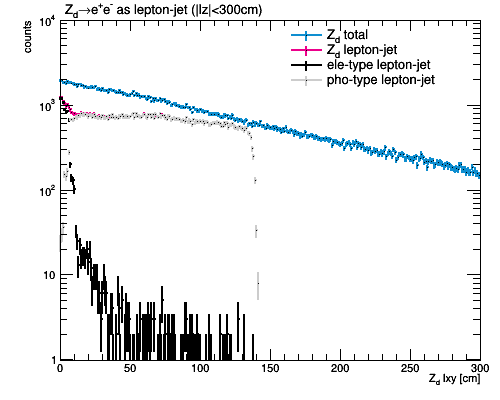

In [8]:
canvas.clear()

dplxy300_total .linecolor=sigCOLORS[0]
dplxy300_total .linewidth=2
dplxy300_passed.linecolor=sigCOLORS[1]
dplxy300_passed.linewidth=2
dplxy300_passed_type1.linecolor=sigCOLORS[2]
dplxy300_passed_type1.linewidth=2
dplxy300_passed_type2.linecolor=sigCOLORS[3]
dplxy300_passed_type2.linewidth=2
draw([dplxy300_total, dplxy300_passed, dplxy300_passed_type1, dplxy300_passed_type2],
     pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} lxy [cm]', ytitle='counts')
leg = Legend(4, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplxy300_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplxy300_passed, 'Z_{d} lepton-jet', 'LEP')
leg.AddEntry(dplxy300_passed_type1, 'ele-type lepton-jet', 'LEP')
leg.AddEntry(dplxy300_passed_type2, 'pho-type lepton-jet', 'LEP')
leg.Draw()
title=TitleAsLatex('Z_{d}#rightarrowe^{+}e^{-} as lepton-jet (|lz|<300cm)')
title.Draw()
canvas.draw()

In [9]:
ljeffi_lxy300g = Efficiency(dplxy300_passed, dplxy300_total).graph
ljeffi_lxy300g_type1 = Efficiency(dplxy300_passed_type1, dplxy300_total).graph
ljeffi_lxy300g_type2 = Efficiency(dplxy300_passed_type2, dplxy300_total).graph

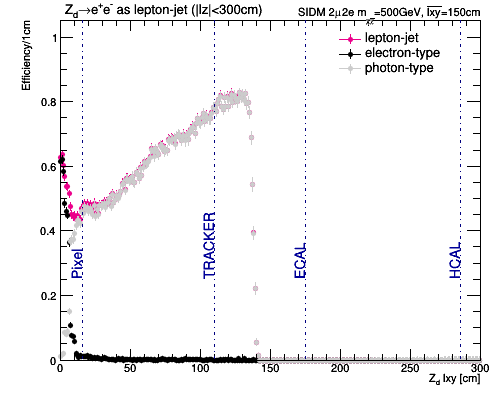

In [11]:
canvas.clear()

ljeffi_lxy300g.drawstyle='APZ0'
ljeffi_lxy300g.color=sigCOLORS[1]
ljeffi_lxy300g.markersize=0.5
ljeffi_lxy300g_type1.drawstyle='PZ0'
ljeffi_lxy300g_type1.color=sigCOLORS[2]
ljeffi_lxy300g_type1.markersize=0.5
ljeffi_lxy300g_type2.drawstyle='PZ0'
ljeffi_lxy300g_type2.color=sigCOLORS[3]
ljeffi_lxy300g_type2.markersize=0.5
draw([ljeffi_lxy300g, ljeffi_lxy300g_type1, ljeffi_lxy300g_type2], xtitle='Z_{d} lxy [cm]', ytitle='Efficiency/1cm')
leg = Legend(3, margin=0.25, leftmargin=0.55,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_lxy300g, 'lepton-jet', 'LEP')
leg.AddEntry(ljeffi_lxy300g_type1, 'electron-type', 'LEP')
leg.AddEntry(ljeffi_lxy300g_type2, 'photon-type', 'LEP')
leg.Draw()
title=TitleAsLatex('Z_{d}#rightarrowe^{+}e^{-} as lepton-jet (|lz|<300cm)')
title.Draw()
linepos = [16, 110, 175, 286] # tracker, ECAL, HCAL
detectors = ['Pixel', 'TRACKER', 'ECAL', 'HCAL']
Y_MIN, Y_MAX = canvas.GetUymin(), canvas.GetUymax()
lines = [Line(i, Y_MIN, i, Y_MAX) for i in linepos]
annotations = [ROOT.TLatex(linepos[i], 0.25, s) for i, s in enumerate(detectors)]
for l in lines:
    l.linestyle='dashdot'
    l.color = 'navy'
    l.Draw()
for s in annotations:
    s.SetTextAlign(11)
    s.SetTextAngle(90)
    s.SetTextSize(0.038)
    s.SetTextColor(ROOT.kBlue+2)
    s.Draw()

sampletag = LuminosityLabel('SIDM 2#mu2e m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm')
sampletag.draw()

canvas.draw()

In [12]:
canvas.save_as('imgs/efficiency_vs_lxy__egmlj.pdf')

INFO:ROOT.TCanvas.Print] pdf file imgs/efficiency_vs_lxy__egmlj.pdf has been created


In [25]:
IN_ECAL = 'dp_lxy<140&abs(dp_lz)<300'
IN_GSF = 'dp_lxy<10&abs(dp_lz)<10'

In [26]:
dpeta_total  = t.Draw(t.b.dp_eta>>('dpeta_total',  100, -2.5, 2.5), IN_ECAL)
dpeta_passed = t.Draw(t.b.dp_eta>>('dpeta_passed', 100, -2.5, 2.5), IN_ECAL+'&lj_gendr>0')

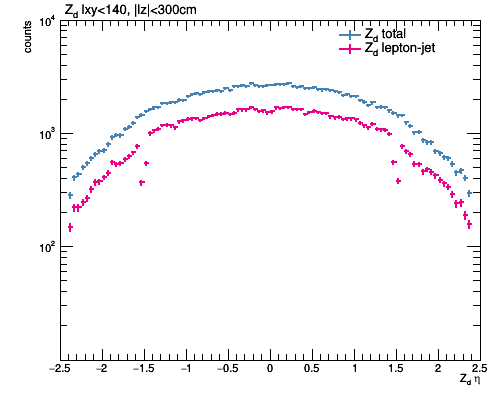

In [27]:
canvas.clear()

dpeta_total .color='steelblue'
dpeta_total .linewidth=2
dpeta_passed.color=sigCOLORS[1]
dpeta_passed.linewidth=2
draw([dpeta_total, dpeta_passed],pad=canvas, logy=True, ylimits=(1e1,1e4), xtitle='Z_{d} #eta', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.55,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dpeta_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dpeta_passed, 'Z_{d} lepton-jet', 'LEP')
leg.Draw()
title=TitleAsLatex('Z_{d} lxy<140, |lz|<300cm')
title.Draw()

canvas.draw()

In [28]:
ljeffi_etag = Efficiency(dpeta_passed, dpeta_total).graph

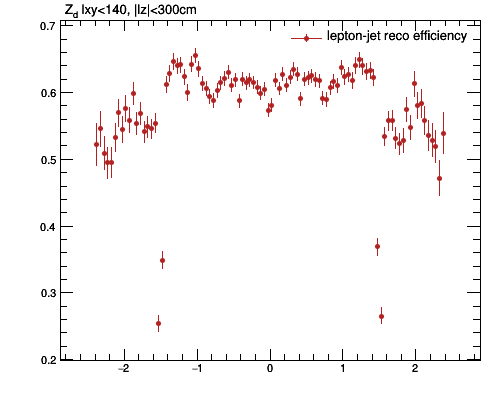

In [29]:
canvas.clear()

ljeffi_etag.drawstyle='APZ'
ljeffi_etag.color='firebrick'
ljeffi_etag.markersize=0.5
draw([ljeffi_etag], pad=canvas, xtitle='Z_{d} #eta', ytitle='Efficiency')
leg = Legend(1, margin=0.25, leftmargin=0.45,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_etag, 'lepton-jet reco efficiency', 'LEP')
leg.Draw()
title=TitleAsLatex('Z_{d} lxy<140, |lz|<300cm')
title.Draw()
canvas.draw()

In [30]:
dpdaudr_total  = t.Draw(t.b.dp_daudr>>('dpdaudr_total',   100, 0, 0.1), IN_ECAL)
dpdaudr_passed = t.Draw(t.b.dp_daudr>>('dpdaudr_passed',  100, 0, 0.1), IN_ECAL+'&lj_gendr>0')

dpdaudr_total_type1  = t.Draw(t.b.dp_daudr>>('dpdaudr_total_type1',   100, 0, 0.1), IN_GSF)
dpdaudr_passed_type1 = t.Draw(t.b.dp_daudr>>('dpdaudr_passed_type1',  100, 0, 0.1), IN_GSF+'&lj_gendr>0')

dpdaudr_total_type2  = t.Draw(t.b.dp_daudr>>('dpdaudr_total_type2',   100, 0, 0.1), '%s&(!(%s))' % (IN_ECAL, IN_GSF))
dpdaudr_passed_type2 = t.Draw(t.b.dp_daudr>>('dpdaudr_passed_type2',  100, 0, 0.1), '%s&(!(%s))&lj_gendr>0' % (IN_ECAL, IN_GSF))

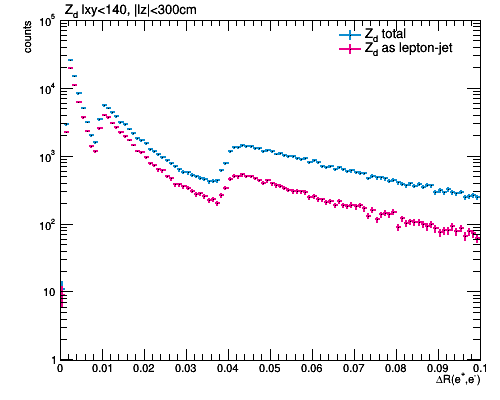

In [31]:
canvas.clear()

dpdaudr_total .linecolor=sigCOLORS[0]
dpdaudr_total .linewidth=2
dpdaudr_passed.linecolor=sigCOLORS[1]
dpdaudr_passed.linewidth=2
draw([dpdaudr_total, dpdaudr_passed],pad=canvas, logy=True, ylimits=(1,1e5), xtitle='#DeltaR(e^{+},e^{-})', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.55,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dpdaudr_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dpdaudr_passed, 'Z_{d} as lepton-jet', 'LEP')
leg.Draw()
title=TitleAsLatex('Z_{d} lxy<140, |lz|<300cm')
title.Draw()
canvas.draw()

In [32]:
ljeffi_daudrg = Efficiency(dpdaudr_passed, dpdaudr_total).graph
ljeffi_daudrg_type1 = Efficiency(dpdaudr_passed_type1, dpdaudr_total_type1).graph
ljeffi_daudrg_type2 = Efficiency(dpdaudr_passed_type2, dpdaudr_total_type2).graph

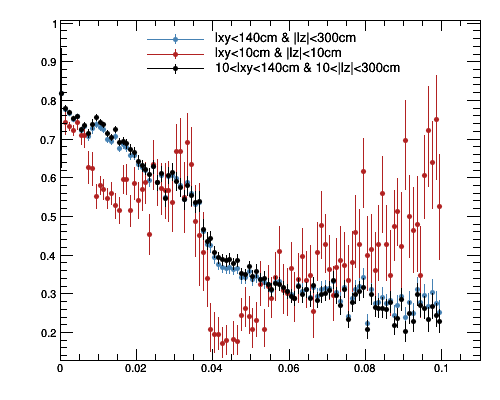

In [33]:
canvas.clear()

ljeffi_daudrg.drawstyle='APZ'
ljeffi_daudrg.markercolor='steelblue'#sigCOLORS[0]
ljeffi_daudrg.linecolor='steelblue'#sigCOLORS[0]
ljeffi_daudrg.markersize=0.5

ljeffi_daudrg_type1.drawstyle='PZ'
ljeffi_daudrg_type1.markercolor='firebrick'#sigCOLORS[1]
ljeffi_daudrg_type1.linecolor='firebrick'#sigCOLORS[1]
ljeffi_daudrg_type1.markersize=0.5

ljeffi_daudrg_type2.drawstyle='PZ'
ljeffi_daudrg_type2.markercolor=sigCOLORS[2]
ljeffi_daudrg_type2.linecolor=sigCOLORS[2]
ljeffi_daudrg_type2.markersize=0.5

draw([ljeffi_daudrg, ljeffi_daudrg_type1, ljeffi_daudrg_type2], xtitle='#DeltaR(e^{+},e^{-})', ytitle='Efficiency')
leg = Legend(3, margin=0.25, leftmargin=0.15,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_daudrg, 'lxy<140cm & |lz|<300cm', 'LEP')
leg.AddEntry(ljeffi_daudrg_type1, 'lxy<10cm & |lz|<10cm', 'LEP')
leg.AddEntry(ljeffi_daudrg_type2, '10<lxy<140cm & 10<|lz|<300cm', 'LEP')

leg.Draw()
canvas.draw()

### $\Delta R$ matching quality

In [34]:
ljgendr = t.Draw('lj_gendr', 'lj_gendr>0')

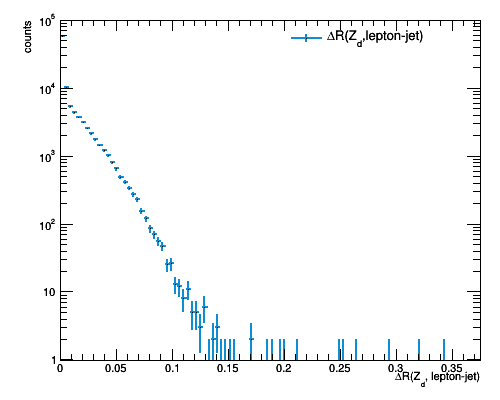

In [35]:
canvas.clear()

ljgendr.linecolor=sigCOLORS[0]
ljgendr.linewidth=2
draw([ljgendr], logy=True, ylimits=(1,1e5), xtitle='#DeltaR(Z_{d}, lepton-jet)', ytitle='counts')
leg = Legend(1, margin=0.25, leftmargin=0.45,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljgendr, '#DeltaR(Z_{d},lepton-jet)', 'LEP')
leg.Draw()
canvas.draw()

### $p_T$ resolution

In [12]:
ljptres = t.Draw('(lj_pt-dp_pt)/dp_pt>>ljptres(50,-0.5,0.5)', 'lj_gendr>0', 'norm')
ljptres_type1 = t.Draw('(lj_pt-dp_pt)/dp_pt>>ljptres_type1(50,-0.5,0.5)', 'lj_gendr>0&lj_nele>0', 'norm')
ljptres_type2 = t.Draw('(lj_pt-dp_pt)/dp_pt>>ljptres_type2(50,-0.5,0.5)', 'lj_gendr>0&lj_nele==0', 'norm')

ljptres = ljptres.merge_bins([(0,1), (-2,-1)])
ljptres_type1 = ljptres_type1.merge_bins([(0,1), (-2,-1)])
ljptres_type2 = ljptres_type2.merge_bins([(0,1), (-2,-1)])

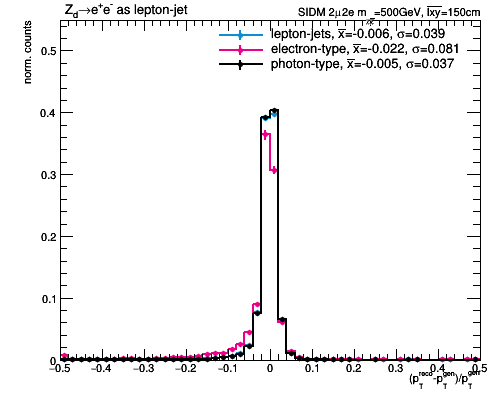

In [14]:
canvas.clear()

hs = [ljptres, ljptres_type1, ljptres_type2]
for i, h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.markersize=0.5
    h.linewidth=2
    h.fillstyle='hollow'
    h.drawstyle='HIST E'

ROOT.gPad.SetLogy(0)
draw([ljptres, ljptres_type1, ljptres_type2], ylimits=(0,0.55),
     pad=canvas, xtitle='(p_{T}^{reco}-p_{T}^{gen})/p_{T}^{gen}', ytitle='norm. counts')

leg=Legend(3, margin=0.25, leftmargin=0.3,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljptres, 'lepton-jets, #bar{x}=%.3f, #sigma=%.3f' % (ljptres.get_mean(), ljptres.get_std_dev()), 'LEP')
leg.AddEntry(ljptres_type1, 'electron-type, #bar{x}=%.3f, #sigma=%.3f' % (ljptres_type1.get_mean(), ljptres_type1.get_std_dev()), 'LEP')
leg.AddEntry(ljptres_type2, 'photon-type, #bar{x}=%.3f, #sigma=%.3f' % (ljptres_type2.get_mean(), ljptres_type2.get_std_dev()), 'LEP')
leg.Draw()

title=TitleAsLatex('Z_{d}#rightarrowe^{+}e^{-} as lepton-jet')
title.Draw()

sampletag = LuminosityLabel('SIDM 2#mu2e m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm')
sampletag.draw()

canvas.draw()

In [15]:
canvas.save_as('imgs/ptresolution__egmlj.pdf')

INFO:ROOT.TCanvas.Print] pdf file imgs/ptresolution__egmlj.pdf has been created


## AK4Jet

### Efficiency

In [39]:
dplxy_total  = t.Draw(t.b.dp_lxy>>('dplxy_total', 500, 0, 750))
dplxy_passed = t.Draw(t.b.dp_lxy>>('dplxy_passed', 500, 0, 750), 'j_gendr>0')

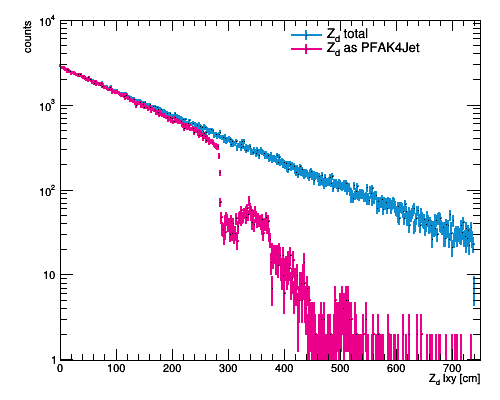

In [40]:
canvas.clear()

dplxy_total .linecolor=sigCOLORS[0]
dplxy_total .linewidth=2
dplxy_passed.linecolor=sigCOLORS[1]
dplxy_passed.linewidth=2

draw([dplxy_total, dplxy_passed, ],
     pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} lxy [cm]', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplxy_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplxy_passed, 'Z_{d} as PFAK4Jet', 'LEP')

leg.Draw()
canvas.draw()

In [41]:
jeffi_g = Efficiency(dplxy_passed, dplxy_total).graph

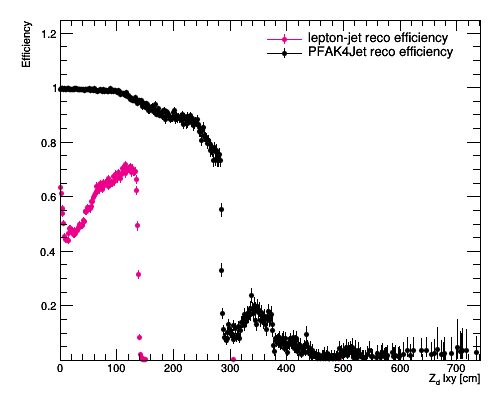

In [42]:
canvas.clear()

ljeffi_g.drawstyle='APZ'
ljeffi_g.color=sigCOLORS[1]
ljeffi_g.markersize=0.5

jeffi_g.drawstyle='PZ'
jeffi_g.color=sigCOLORS[2]
jeffi_g.markersize=0.5

draw([ljeffi_g, jeffi_g], xtitle='Z_{d} lxy [cm]', ytitle='Efficiency')
leg = Legend(2, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_g, 'lepton-jet reco efficiency', 'LEP')
leg.AddEntry(jeffi_g, 'PFAK4Jet reco efficiency', 'LEP')
leg.Draw()
canvas.draw()

In [43]:
dplz_total  = t.Draw(abs(t.b.dp_lz)>>('dplz_total', 500, 0, 750))
dplz_passed = t.Draw(abs(t.b.dp_lz)>>('dplz_passed', 500, 0, 750), 'j_gendr>0')

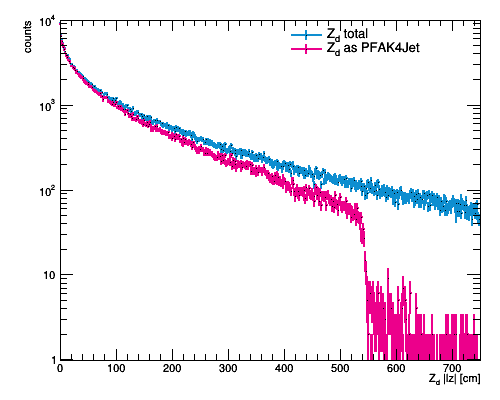

In [44]:
canvas.clear()

dplz_total .linecolor=sigCOLORS[0]
dplz_total .linewidth=2
dplz_passed.linecolor=sigCOLORS[1]
dplz_passed.linewidth=2

draw([dplz_total, dplz_passed, ],
     pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} |lz| [cm]', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplxy_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplxy_passed, 'Z_{d} as PFAK4Jet', 'LEP')

leg.Draw()
canvas.draw()

In [45]:
jlzeffi_g = Efficiency(dplz_passed, dplz_total).graph

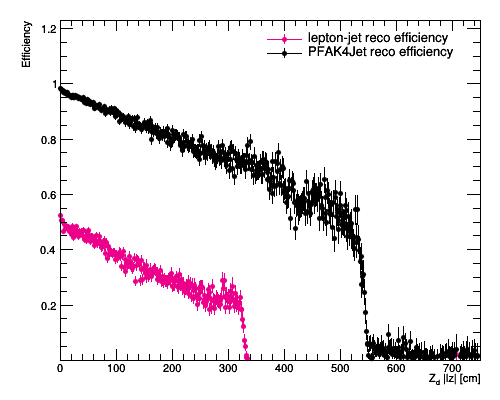

In [46]:
canvas.clear()

ljlzeffi_g.drawstyle='APZ'
ljlzeffi_g.color=sigCOLORS[1]
ljlzeffi_g.markersize=0.5

jlzeffi_g.drawstyle='PZ'
jlzeffi_g.color=sigCOLORS[2]
jlzeffi_g.markersize=0.5

draw([ljlzeffi_g, jlzeffi_g], xtitle='Z_{d} |lz| [cm]', ytitle='Efficiency')
leg = Legend(2, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljlzeffi_g, 'lepton-jet reco efficiency', 'LEP')
leg.AddEntry(jlzeffi_g, 'PFAK4Jet reco efficiency', 'LEP')
leg.Draw()
canvas.draw()

In [47]:
IN_HCAL = 'dp_lxy<270&abs(dp_lz)<520'

In [48]:
dpeta_total  = t.Draw(t.b.dp_eta>>('dpeta_total',  100, -2.5, 2.5), IN_HCAL)
dpeta_passed = t.Draw(t.b.dp_eta>>('dpeta_passed', 100, -2.5, 2.5), IN_HCAL+'&j_gendr>0')

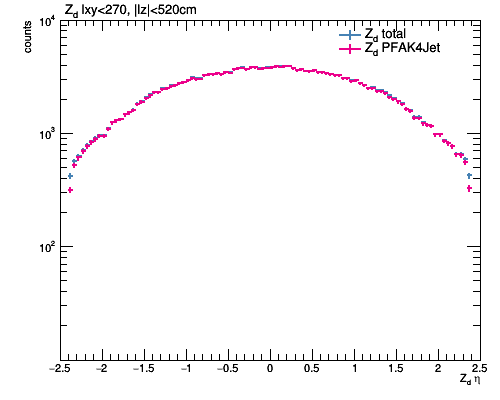

In [49]:
canvas.clear()

dpeta_total .color='steelblue'
dpeta_total .linewidth=2
dpeta_passed.color=sigCOLORS[1]
dpeta_passed.linewidth=2
draw([dpeta_total, dpeta_passed],pad=canvas, logy=True, ylimits=(1e1,1e4), xtitle='Z_{d} #eta', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.55,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dpeta_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dpeta_passed, 'Z_{d} PFAK4Jet', 'LEP')
leg.Draw()
title=TitleAsLatex('Z_{d} lxy<270, |lz|<520cm')
title.Draw()

canvas.draw()

In [50]:
jeffi_etag = Efficiency(dpeta_passed, dpeta_total).graph

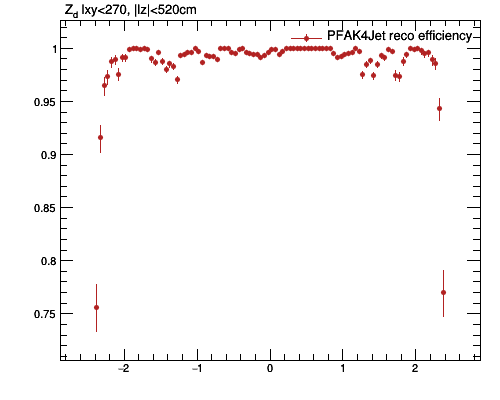

In [51]:
canvas.clear()

jeffi_etag.drawstyle='APZ'
jeffi_etag.color='firebrick'
jeffi_etag.markersize=0.5
draw(jeffi_etag, pad=canvas, xtitle='Z_{d} #eta', ytitle='Efficiency')
leg = Legend(1, margin=0.25, leftmargin=0.45,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(jeffi_etag, 'PFAK4Jet reco efficiency', 'LEP')
leg.Draw()
title=TitleAsLatex('Z_{d} lxy<270, |lz|<520cm')
title.Draw()
canvas.draw()

### $p_T$ resolution

In [52]:
ptres = t.Draw('(j_pt-dp_pt)/dp_pt>>ptres(50,-1,1.5)', 'j_gendr>0')
rawptRes = t.Draw('(j_rawpt-dp_pt)/dp_pt>>rawptres(50,-1,1.5)', 'j_gendr>0')
rawCorrPtRes = t.Draw('(j_rawpt-rho*0.5-dp_pt)/dp_pt>>rawCorrPtRes(50,-1,1.5)', 'j_gendr>0')

ptres = ptres.merge_bins([(0,1), (-2,-1)])
rawptRes = rawptRes.merge_bins([(0,1), (-2,-1)])
rawCorrPtRes = rawCorrPtRes.merge_bins([(0,1), (-2,-1)])

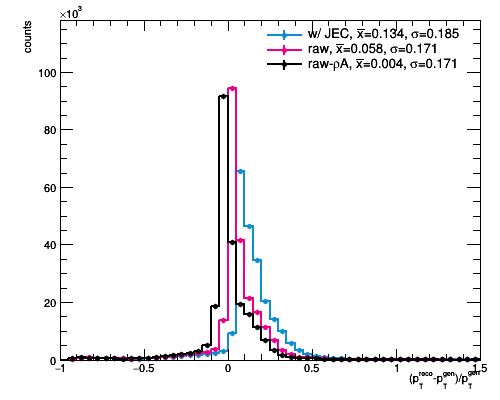

In [53]:
canvas.clear()

ptres.color=sigCOLORS[0]
rawptRes.color=sigCOLORS[1]
rawCorrPtRes.color=sigCOLORS[2]

hs = [ptres, rawptRes, rawCorrPtRes]
for h in hs:
    h.markersize=0.5
    h.linewidth=2
    h.drawstyle='HIST E'
    
draw([ptres, rawptRes, rawCorrPtRes], pad=canvas, xtitle='(p_{T}^{reco}-p_{T}^{gen})/p_{T}^{gen}', ytitle='counts')

leg=Legend(3, margin=0.25, leftmargin=0.4,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ptres, 'w/ JEC, #bar{x}=%.3f, #sigma=%.3f' % (ptres.get_mean(), ptres.get_std_dev()), 'LEP')
leg.AddEntry(rawptRes, 'raw, #bar{x}=%.3f, #sigma=%.3f' % (rawptRes.get_mean(), rawptRes.get_std_dev()), 'LEP')
leg.AddEntry(rawCorrPtRes, 'raw-#rhoA, #bar{x}=%.3f, #sigma=%.3f' % (rawCorrPtRes.get_mean(), rawCorrPtRes.get_std_dev()), 'LEP')
leg.Draw()

canvas.draw()

## ONLY in HCAL
- 140<lxy<270
- 300<|lz|<520

or `IN_HCAL&!IN_ECAL`

In [54]:
MATCHED_HCAL_ONLY = 'j_gendr>0&%s&(!(%s))' % (IN_HCAL, IN_ECAL)

hadfrac = t.Draw('j_hadfrac', MATCHED_HCAL_ONLY)
neuhadfrac = t.Draw('j_neuhadfrac', MATCHED_HCAL_ONLY)
emfrac = t.Draw('j_emfrac', MATCHED_HCAL_ONLY)
neuemfrac = t.Draw('j_neuemfrac', MATCHED_HCAL_ONLY)

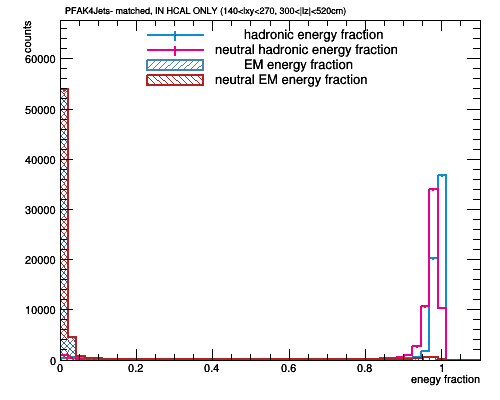

In [55]:
canvas.clear()

hadfrac.linecolor=sigCOLORS[0]
hadfrac.linewidth=2
hadfrac.drawstyle='HIST E'
neuhadfrac.linecolor=sigCOLORS[1]
neuhadfrac.linewidth=2
neuhadfrac.drawstyle='HIST E'
emfrac.color='steelblue'
emfrac.linewidth=2
emfrac.fillstyle=3354
emfrac.drawstyle='HIST E'
neuemfrac.color='firebrick'#sigCOLORS[3]
neuemfrac.linewidth=2
neuemfrac.fillstyle=3345
neuemfrac.drawstyle='HIST E'

draw([hadfrac, neuhadfrac, emfrac, neuemfrac], pad=canvas, xtitle='enegy fraction', ytitle='counts')

leg=Legend(4, margin=0.25, leftmargin=0.15,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(hadfrac,    '        hadronic energy fraction', 'LEP')
leg.AddEntry(neuhadfrac, 'neutral hadronic energy fraction', 'LEP')
leg.AddEntry(emfrac,    '        EM energy fraction', 'F')
leg.AddEntry(neuemfrac, 'neutral EM energy fraction', 'F')
leg.Draw()

title = TitleAsLatex('PFAK4Jets- matched, IN HCAL ONLY (140<lxy<270, 300<|lz|<520cm)')
title.Draw()

canvas.Draw()

In [56]:
jetid = t.Draw('j_id', MATCHED_HCAL_ONLY, 'norm')

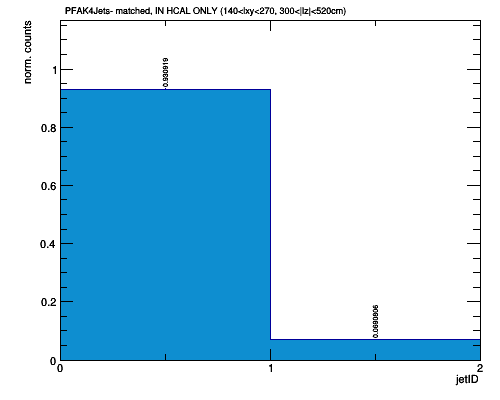

In [57]:
canvas.clear()

jetid.fillcolor=sigCOLORS[0]
jetid.fillstyle='solid'
jetid.drawstyle='HIST E TEXT'
draw(jetid, pad=canvas, xdivisions=202, xtitle='jetID', ytitle='norm. counts')
title = TitleAsLatex('PFAK4Jets- matched, IN HCAL ONLY (140<lxy<270, 300<|lz|<520cm)')
title.Draw()
canvas.draw()

In [58]:
rawptRes = t.Draw('(j_rawpt-dp_pt)/dp_pt', MATCHED_HCAL_ONLY)
rawptRes_neuhadfrac0p9 = t.Draw('(j_rawpt-dp_pt)/dp_pt', MATCHED_HCAL_ONLY+'&j_neuhadfrac>0.9')
rawCorrPtRes_neuhadfrac0p9 = t.Draw('(j_rawpt-dp_pt-rho*0.5)/dp_pt', MATCHED_HCAL_ONLY+'&j_neuhadfrac>0.9')

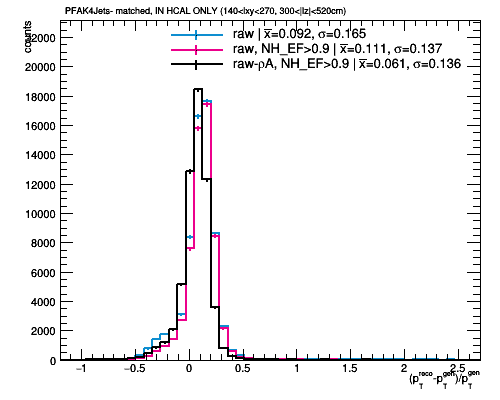

In [59]:
canvas.clear()

rawptRes.linecolor=sigCOLORS[0]
rawptRes_neuhadfrac0p9.linecolor=sigCOLORS[1]
rawCorrPtRes_neuhadfrac0p9.linecolor=sigCOLORS[2]

hs = [rawptRes, rawptRes_neuhadfrac0p9, rawCorrPtRes_neuhadfrac0p9]
for h in hs:
    h.linewidth = 2
    h.drawstyle='HIST E'

draw([rawptRes, rawptRes_neuhadfrac0p9, rawCorrPtRes_neuhadfrac0p9], pad=canvas, xtitle='(p_{T}^{reco}-p_{T}^{gen})/p_{T}^{gen}', ytitle='counts')

leg=Legend(3, margin=0.25, leftmargin=0.2,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(rawptRes, 'raw | #bar{x}=%.3f, #sigma=%.3f' % (rawptRes.get_mean(), rawptRes.get_std_dev()), 'LEP')
leg.AddEntry(rawptRes_neuhadfrac0p9, 'raw, NH_EF>0.9 | #bar{x}=%.3f, #sigma=%.3f' % (rawptRes_neuhadfrac0p9.get_mean(), rawptRes_neuhadfrac0p9.get_std_dev()), 'LEP')
leg.AddEntry(rawCorrPtRes_neuhadfrac0p9, 'raw-#rhoA, NH_EF>0.9 | #bar{x}=%.3f, #sigma=%.3f' % (rawCorrPtRes_neuhadfrac0p9.get_mean(), rawCorrPtRes_neuhadfrac0p9.get_std_dev()), 'LEP')
leg.Draw()

title = TitleAsLatex('PFAK4Jets- matched, IN HCAL ONLY (140<lxy<270, 300<|lz|<520cm)')
title.Draw()

canvas.draw()

## in ECAL
- lxy<140
- |lz|<300

or `IN_ECAL`

In [60]:
MATCHED_IN_ECAL = 'j_gendr>0&%s' % IN_ECAL

hadfrac = t.Draw('j_hadfrac', MATCHED_IN_ECAL)
neuhadfrac = t.Draw('j_neuhadfrac', MATCHED_IN_ECAL)
emfrac = t.Draw('j_emfrac', MATCHED_IN_ECAL)
neuemfrac = t.Draw('j_neuemfrac', MATCHED_IN_ECAL)

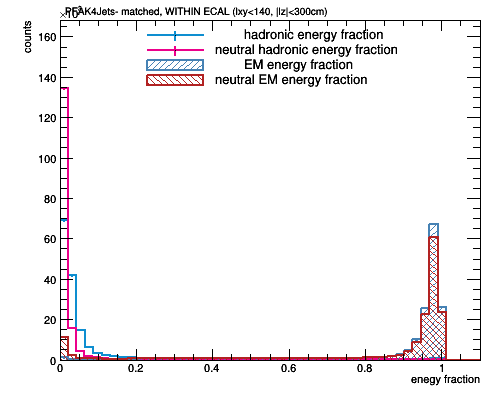

In [61]:
canvas.clear()

hadfrac.linecolor=sigCOLORS[0]
hadfrac.linewidth=2
hadfrac.drawstyle='HIST E'
neuhadfrac.linecolor=sigCOLORS[1]
neuhadfrac.linewidth=2
neuhadfrac.drawstyle='HIST E'
emfrac.color='steelblue'
emfrac.linewidth=2
emfrac.fillstyle=3354
emfrac.drawstyle='HIST E'
neuemfrac.color='firebrick'#sigCOLORS[3]
neuemfrac.linewidth=2
neuemfrac.fillstyle=3345
neuemfrac.drawstyle='HIST E'

draw([hadfrac, neuhadfrac, emfrac, neuemfrac], pad=canvas, xtitle='enegy fraction', ytitle='counts')

leg=Legend(4, margin=0.25, leftmargin=0.15,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(hadfrac,    '        hadronic energy fraction', 'LEP')
leg.AddEntry(neuhadfrac, 'neutral hadronic energy fraction', 'LEP')
leg.AddEntry(emfrac,    '        EM energy fraction', 'F')
leg.AddEntry(neuemfrac, 'neutral EM energy fraction', 'F')
leg.Draw()

title = TitleAsLatex('PFAK4Jets- matched, WITHIN ECAL (lxy<140, |lz|<300cm)')
title.Draw()

canvas.Draw()

In [62]:
jetid = t.Draw('j_id', MATCHED_IN_ECAL, 'norm')

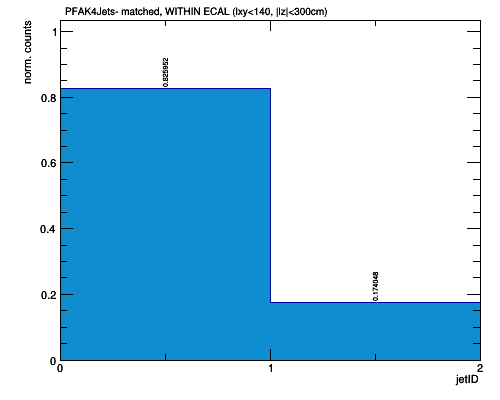

In [63]:
canvas.clear()

jetid.fillcolor=sigCOLORS[0]
jetid.fillstyle='solid'
jetid.drawstyle='HIST E TEXT'
draw(jetid, pad=canvas, xdivisions=202, xtitle='jetID', ytitle='norm. counts')
title = TitleAsLatex('PFAK4Jets- matched, WITHIN ECAL (lxy<140, |lz|<300cm)')
title.Draw()
canvas.draw()

### $p_T$ resolution

In [64]:
rawptRes = t.Draw('(j_rawpt-dp_pt)/dp_pt>>rawptRes(50,-0.5,0.5)', MATCHED_IN_ECAL)
rawptRes_emfrac0p9 = t.Draw('(j_rawpt-dp_pt)/dp_pt>>rawptRes_emfrac0p9(50,-0.5,0.5)', MATCHED_IN_ECAL+'&j_emfrac>0.9')
rawCorrPtRes_emfrac0p9 = t.Draw('(j_rawpt-dp_pt-rho*0.5)/dp_pt>>rawCorrPtRes_emfrac0p9(50,-0.5,0.5)', MATCHED_IN_ECAL+'&j_emfrac>0.9')

rawptRes = rawptRes.merge_bins([(0,1), (-2,-1)])
rawptRes_emfrac0p9 = rawptRes_emfrac0p9.merge_bins([(0,1), (-2,-1)])
rawCorrPtRes_emfrac0p9 = rawCorrPtRes_emfrac0p9.merge_bins([(0,1), (-2,-1)])

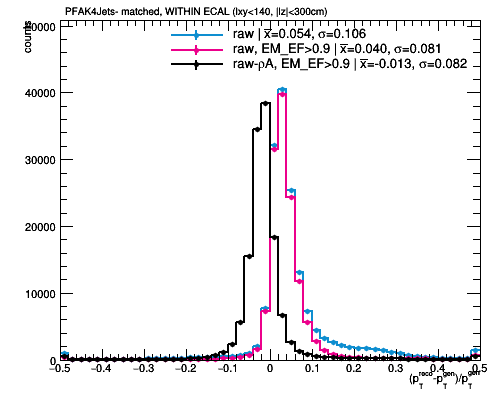

In [65]:
canvas.clear()


hs = [rawptRes, rawptRes_emfrac0p9, rawCorrPtRes_emfrac0p9]
for i, h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.fillstyle='hollow'
    h.markersize=0.5
    h.linewidth = 2
    h.drawstyle='HIST E'

draw([rawptRes, rawptRes_emfrac0p9, rawCorrPtRes_emfrac0p9], pad=canvas, xtitle='(p_{T}^{reco}-p_{T}^{gen})/p_{T}^{gen}', ytitle='counts')

leg=Legend(3, margin=0.25, leftmargin=0.2,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(rawptRes, 'raw | #bar{x}=%.3f, #sigma=%.3f' % (rawptRes.get_mean(), rawptRes.get_std_dev()), 'LEP')
leg.AddEntry(rawptRes_emfrac0p9, 'raw, EM_EF>0.9 | #bar{x}=%.3f, #sigma=%.3f' % (rawptRes_emfrac0p9.get_mean(), rawptRes_emfrac0p9.get_std_dev()), 'LEP')
leg.AddEntry(rawCorrPtRes_emfrac0p9, 'raw-#rhoA, EM_EF>0.9 | #bar{x}=%.3f, #sigma=%.3f' % (rawCorrPtRes_emfrac0p9.get_mean(), rawCorrPtRes_emfrac0p9.get_std_dev()), 'LEP')
leg.Draw()

title = TitleAsLatex('PFAK4Jets- matched, WITHIN ECAL (lxy<140, |lz|<300cm)')
title.Draw()

canvas.draw()

Those matched PFAK4Jets who have large charged EM energy fraction (>0.9)

In [66]:
smalllxy = t.Draw("dp_lxy", MATCHED_IN_ECAL+"&(j_emfrac-j_neuemfrac)>0.9")

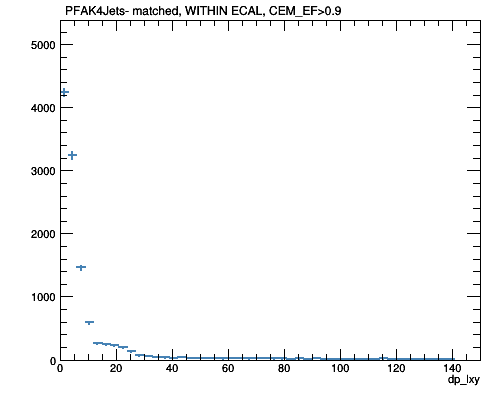

In [67]:
canvas.clear()

smalllxy.color='steelblue'
smalllxy.linewidth=2
draw(smalllxy, pad=canvas,)

title = TitleAsLatex('PFAK4Jets- matched, WITHIN ECAL, CEM_EF>0.9')
title.Draw()

canvas.draw()

## lepton-jet source
### Efficiency

In [13]:
LIMIT_LZ = 'abs(dp_lz)<300'

dplxy300_total  = t.Draw(t.b.dp_lxy>>('dplxy300_total', 300, 0, 300), LIMIT_LZ)
dplxy300_passed = t.Draw(t.b.dp_lxy>>('dplxy300_passed', 300, 0, 300), LIMIT_LZ+'&ljsrc_gendr>0')
dplxy300_passed_type1 = t.Draw(t.b.dp_lxy>>('dplxy300_passed_type1', 300, 0, 300), LIMIT_LZ+'&ljsrc_gendr>0&ljsrc_type==2')
dplxy300_passed_type2 = t.Draw(t.b.dp_lxy>>('dplxy300_passed_type2', 300, 0, 300), LIMIT_LZ+'&ljsrc_gendr>0&ljsrc_type==4')

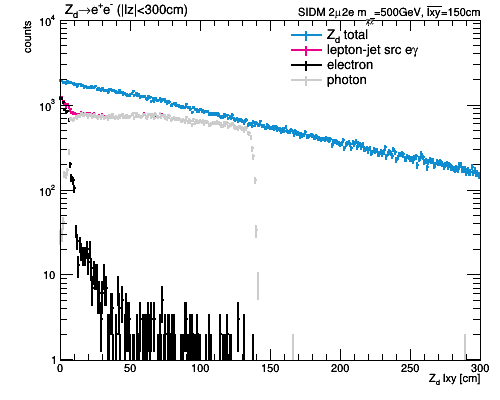

In [14]:
canvas.clear()

hs = [dplxy300_total, dplxy300_passed, dplxy300_passed_type1, dplxy300_passed_type2]
for i,h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.linewidth=2

draw(hs[:], pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} lxy [cm]', ytitle='counts')
leg = Legend(len(hs), margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplxy300_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplxy300_passed, 'lepton-jet src e#gamma', 'LEP')
leg.AddEntry(dplxy300_passed_type1, 'electron', 'LEP')
leg.AddEntry(dplxy300_passed_type2, 'photon', 'LEP')
leg.Draw()
title=TitleAsLatex('Z_{d}#rightarrowe^{+}e^{-} (|lz|<300cm)')
title.Draw()
sampletag = LuminosityLabel('SIDM 2#mu2e m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm')
sampletag.draw()
canvas.draw()

In [15]:
ljeffi_lxy300g = Efficiency(dplxy300_passed, dplxy300_total).graph
ljeffi_lxy300g_type1 = Efficiency(dplxy300_passed_type1, dplxy300_total).graph
ljeffi_lxy300g_type2 = Efficiency(dplxy300_passed_type2, dplxy300_total).graph

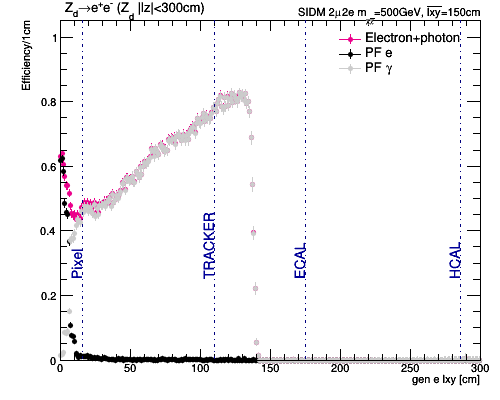

In [17]:
canvas.clear()

ljeffi_lxy300g.drawstyle='APZ0'
ljeffi_lxy300g.color=sigCOLORS[1]
ljeffi_lxy300g.markersize=0.5
ljeffi_lxy300g_type1.drawstyle='PZ0'
ljeffi_lxy300g_type1.color=sigCOLORS[2]
ljeffi_lxy300g_type1.markersize=0.5
ljeffi_lxy300g_type2.drawstyle='PZ0'
ljeffi_lxy300g_type2.color=sigCOLORS[3]
ljeffi_lxy300g_type2.markersize=0.5
draw([ljeffi_lxy300g, ljeffi_lxy300g_type1, ljeffi_lxy300g_type2], xtitle='gen e lxy [cm]', ytitle='Efficiency/1cm')
leg = Legend(3, margin=0.25, leftmargin=0.55,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_lxy300g, 'Electron+photon', 'LEP')
leg.AddEntry(ljeffi_lxy300g_type1, 'PF e', 'LEP')
leg.AddEntry(ljeffi_lxy300g_type2, 'PF #gamma', 'LEP')
leg.Draw()
title=TitleAsLatex('Z_{d}#rightarrowe^{+}e^{-} (Z_{d} |lz|<300cm)')
title.Draw()
linepos = [16, 110, 175, 286] # tracker, ECAL, HCAL
detectors = ['Pixel', 'TRACKER', 'ECAL', 'HCAL']
Y_MIN, Y_MAX = canvas.GetUymin(), canvas.GetUymax()
lines = [Line(i, Y_MIN, i, Y_MAX) for i in linepos]
annotations = [ROOT.TLatex(linepos[i], 0.25, s) for i, s in enumerate(detectors)]
for l in lines:
    l.linestyle='dashdot'
    l.color = 'navy'
    l.Draw()
for s in annotations:
    s.SetTextAlign(11)
    s.SetTextAngle(90)
    s.SetTextSize(0.038)
    s.SetTextColor(ROOT.kBlue+2)
    s.Draw()

sampletag = LuminosityLabel('SIDM 2#mu2e m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm')
sampletag.draw()

canvas.draw()

In [18]:
canvas.save_as('imgs/efficiency_vs_lxy__srcegm.pdf')

INFO:ROOT.TCanvas.Print] pdf file imgs/efficiency_vs_lxy__srcegm.pdf has been created


### $p_T$ resolution

In [7]:
egmcand_reso = t.Draw('(ljsrc_pt-dp_pt)/dp_pt>>egmcand_reso(50,-0.5,0.5)', 'ljsrc_gendr>0', 'norm')
egmcand_type1_reso = t.Draw('(ljsrc_pt-dp_pt)/dp_pt>>egmcand_type1_reso(50,-0.5,0.5)', 'ljsrc_gendr>0&ljsrc_type==2', 'norm')
egmcand_type2_reso = t.Draw('(ljsrc_pt-dp_pt)/dp_pt>>egmcand_type2_reso(50,-0.5,0.5)', 'ljsrc_gendr>0&ljsrc_type==4', 'norm')

egmcand_reso = egmcand_reso.merge_bins([(0,1), (-2,-1)])
egmcand_type1_reso = egmcand_type1_reso.merge_bins([(0,1), (-2,-1)])
egmcand_type2_reso = egmcand_type2_reso.merge_bins([(0,1), (-2,-1)])

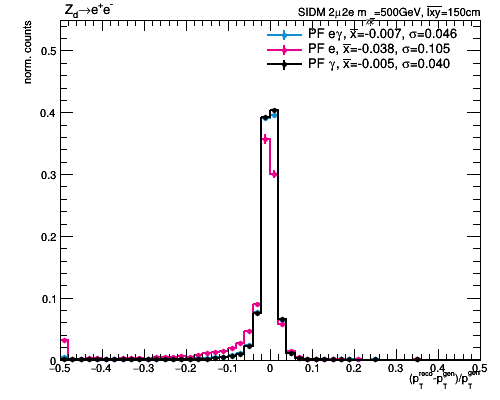

In [13]:
canvas.clear()

hs = [egmcand_reso, egmcand_type1_reso, egmcand_type2_reso]
for i, h in enumerate(hs):
    h.color=sigCOLORS[i]
    h.markersize=0.5
    h.linewidth=2
    h.fillstyle='hollow'
    h.drawstyle='HIST E'

ROOT.gPad.SetLogy(0)
draw(hs[:], ylimits=(0,0.55),
     pad=canvas, xtitle='(p_{T}^{reco}-p_{T}^{gen})/p_{T}^{gen}', ytitle='norm. counts')

leg=Legend(len(hs), margin=0.25, leftmargin=0.4,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(egmcand_reso, 'PF e#gamma, #bar{x}=%.3f, #sigma=%.3f' % (egmcand_reso.get_mean(), egmcand_reso.get_std_dev()), 'LEP')
leg.AddEntry(egmcand_type1_reso, 'PF e, #bar{x}=%.3f, #sigma=%.3f' % (egmcand_type1_reso.get_mean(), egmcand_type1_reso.get_std_dev()), 'LEP')
leg.AddEntry(egmcand_type2_reso, 'PF #gamma, #bar{x}=%.3f, #sigma=%.3f' % (egmcand_type2_reso.get_mean(), egmcand_type2_reso.get_std_dev()), 'LEP')
leg.Draw()

title=TitleAsLatex('Z_{d}#rightarrowe^{+}e^{-}')
title.Draw()

sampletag = LuminosityLabel('SIDM 2#mu2e m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm')
sampletag.draw()

canvas.draw()

In [14]:
canvas.save_as('imgs/ptresolution__srcegm.pdf')

INFO:ROOT.TCanvas.Print] pdf file imgs/ptresolution__srcegm.pdf has been created
